In [69]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer, transpile
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

In [70]:
q = QuantumRegister(3, name="q")
ancilla = QuantumRegister(2, name="ancilla")
out = ClassicalRegister(3, name="out")

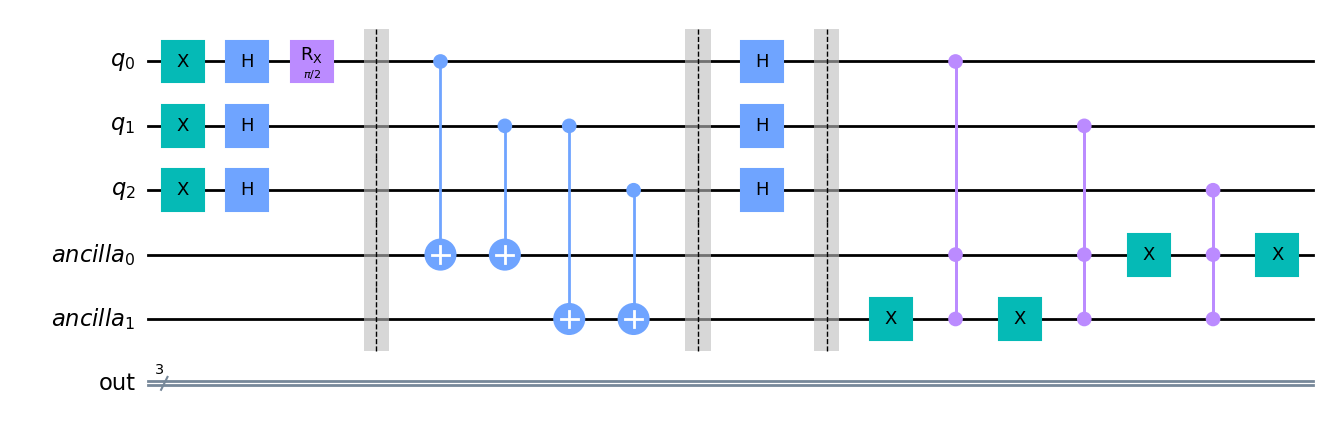

In [124]:
qc = QuantumCircuit(q, ancilla, out)


qc.x(q)
qc.h(q)
qc.rx(np.pi/2, q[0])

qc.barrier()

qc.cx(q[0], ancilla[0])
qc.cx(q[1], ancilla[0])
qc.cx(q[1], ancilla[1])
qc.cx(q[2], ancilla[1])

qc.barrier()

qc.h(q)


qc.barrier()

qc.x(ancilla[1])
qc.ccz(ancilla[0], ancilla[1], q[0])
qc.x(ancilla[1])

qc.ccz(ancilla[0], ancilla[1], q[1])

qc.x(ancilla[0])
qc.ccz(ancilla[0], ancilla[1], q[2])
qc.x(ancilla[0])


qc.draw("mpl")

In [125]:
Statevector(qc).draw("latex")

<IPython.core.display.Latex object>

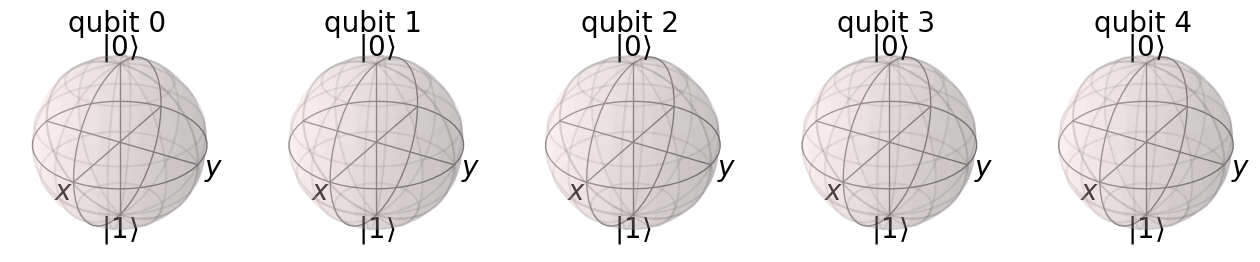

In [122]:
plot_bloch_multivector(qc)

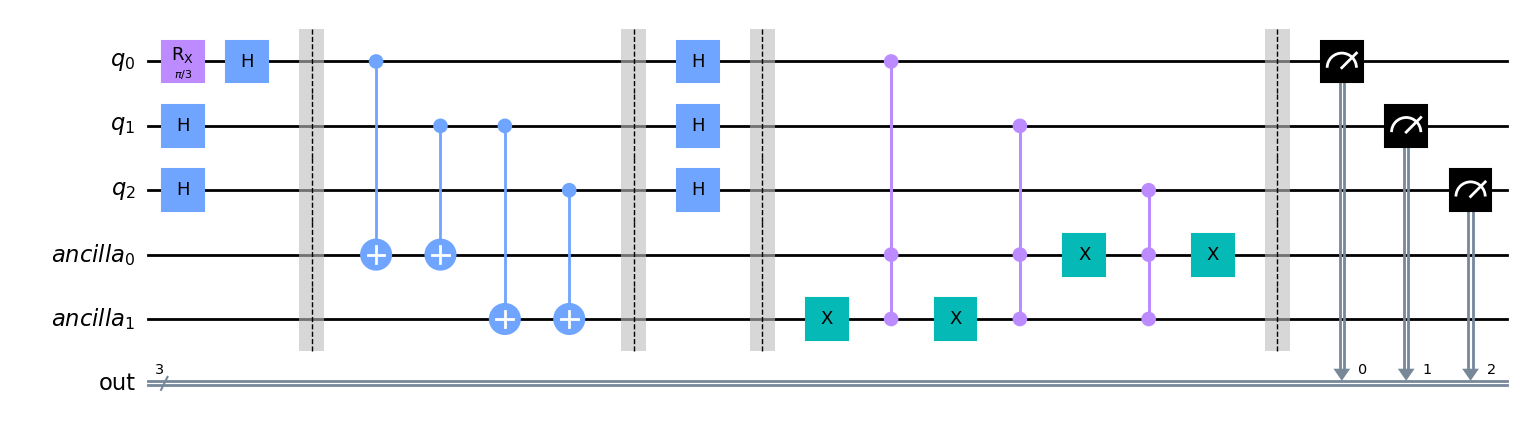

In [101]:
qc.barrier()
qc.measure(q, out)
qc.draw("mpl")

In [102]:
sim = Aer.get_backend("aer_simulator")
sim.run(transpile(qc, sim)).result().get_counts()

{'001': 55,
 '011': 190,
 '111': 68,
 '100': 64,
 '101': 188,
 '010': 74,
 '000': 180,
 '110': 205}